Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import random
from collections import deque

#import pydot
from matplotlib import pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [15]:
random.seed(42)
BLOCKS = [random.randint(1, 50) for _ in range(10)]
BLOCKS

[41, 8, 2, 48, 18, 16, 15, 9, 48, 7]

In [45]:
GOAL = 79

In [56]:
search_tree = nx.DiGraph()

frontier = deque()
frontier.append(((), tuple(sorted(BLOCKS, reverse=False))))
node_color = dict()

n = 0
while frontier:
    n += 1
    current_bag, available_blocks = frontier.popleft()
    search_tree.add_node(current_bag)
    node_color[current_bag] = 'yellow'
    if sum(current_bag) == GOAL:
        print(f"Whoa! Found a solution in {n:,} steps\n\t{current_bag}")
        node_color[current_bag] = 'lime'
        break
    if sum(current_bag) > GOAL:
        node_color[current_bag] = 'red'
        continue
    node_color[current_bag] = 'royalblue'
    for i, object in enumerate(available_blocks):
        new_state = ((*current_bag, object), tuple(available_blocks[:i]+available_blocks[i+1:]))
        search_tree.add_node(new_state[0])
        node_color[new_state[0]] = 'lavender'
        search_tree.add_edge(current_bag, new_state[0], label=object)
        frontier.appendleft(new_state)


Whoa! Found a solution in 82 steps
	(48, 16, 15)


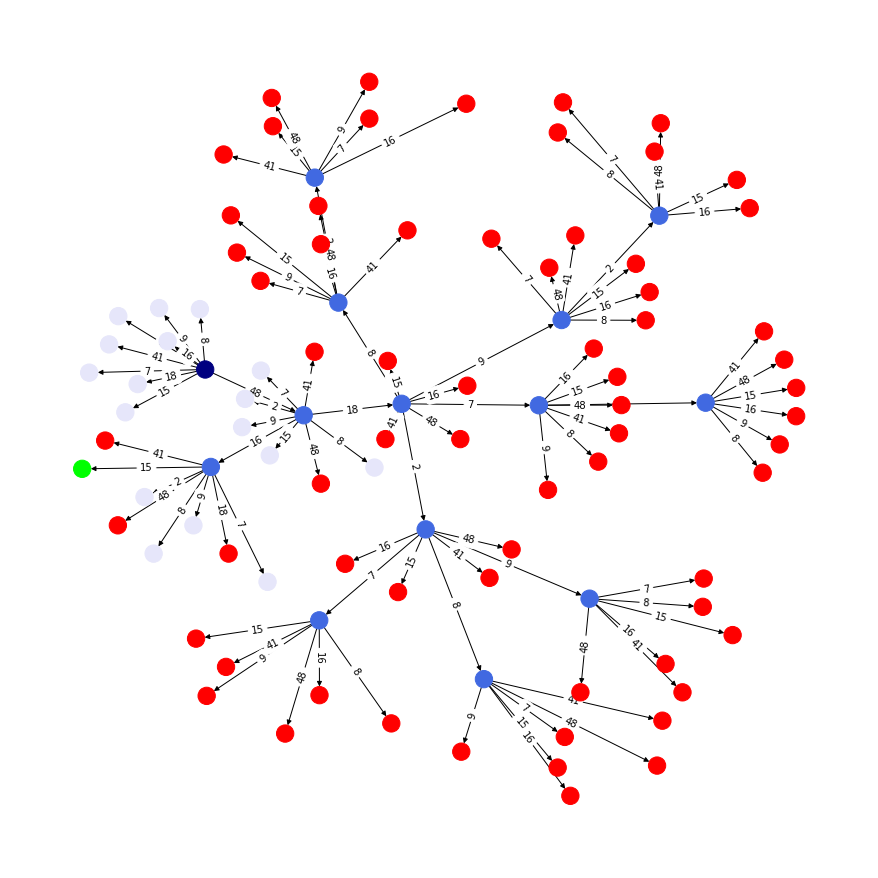

In [69]:
# dot neato twopi circo fdp sfdp
node_color[()] = 'navy'
plt.figure(figsize=(12, 12)) 
pos=graphviz_layout(search_tree, prog='fdp')
nx.draw(search_tree, pos=pos,
        node_color=[node_color[n] for n in search_tree.nodes],
        with_labels=False)
nx.draw_networkx_edge_labels(search_tree, pos=pos, edge_labels=nx.get_edge_attributes(search_tree, 'label'))
None